# mapC

In [1]:

import trackc as tc
import cooler
import warnings
warnings.simplefilter("ignore")


## get test data
you can get test data from the following url:

https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM4417639&format=file&file=GSM4417639%5FSK%2DN%2DDZ%5FC6BC81F2%5Fb38d5%2Emcool

## plot all chrom contact heatmap

In [33]:
!cooler ls ./GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool

./GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/10000
./GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/20000
./GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/40000
./GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/80000
./GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/160000
./GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/320000
./GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/640000
./GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/1280000
./GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/2560000
./GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/5120000
./GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/10240000


no max min range
maxrange: 1141.0 minrange: 3.0


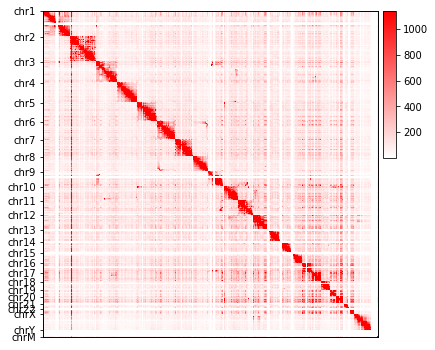

In [37]:
clr = cooler.Cooler('./GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::resolutions/5120000')
fig, axs = tc.make_spec(figsize=(6,6), width_ratios=[1], wspace=0.2)

mat = clr.matrix(balance=False)[:]
tc.pl.mapC(ax=axs[0], mat=mat, map_type='squ', symmetric=True)
chromstarts = [clr.extent(i)[0] for i in clr.chromnames]
_ = axs[0].set(yticks=chromstarts, yticklabels=clr.chromnames)
#tc.savefig('all_chrom_cmap.pdf')

## plot one chrom

maxrange: 3000 minrange: 3.0


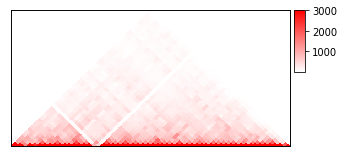

In [42]:
fig, axs = tc.make_spec(figsize=(5,2.5), width_ratios=[1], wspace=0.2)
mat = tc.tl.extractCisContact(clr='GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/2560000', region='chr8')
tc.pl.mapC(ax=axs[0], mat=mat, maxrange=3000)
#tc.savefig('chrom_cmap_tri.pdf')

## plot one chrom region

no max min range
maxrange: 13.0 minrange: 1.0
no max min range
maxrange: 29.0 minrange: 1.0


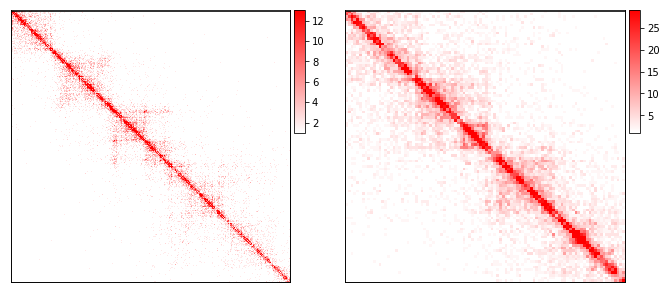

In [63]:
fig, axs = tc.make_spec(figsize=(11,5), width_ratios=[1,1], wspace=0.2)
mat = tc.tl.extractCisContact(clr='GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/10000', 
                              region='chr8:124000000-127000000')
tc.pl.mapC(ax=axs[0], mat=mat, map_type='squ', symmetric=True)

mat2 = tc.tl.extractCisContact(clr='GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/20000', 
                              region='chr8:51000000-53000000')
tc.pl.mapC(ax=axs[1], mat=mat2, map_type='squ', symmetric=True)
#tc.savefig('chrom_cmap_region_squ.pdf')

## plot interaction of partial chromosomes

maxrange: 10000 minrange: 10.0


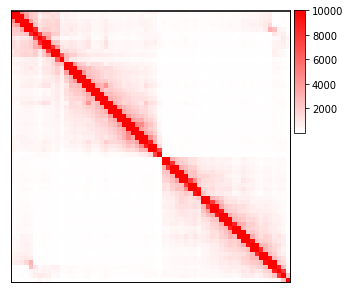

In [56]:
fig, axs = tc.make_spec(figsize=(5,5), width_ratios=[1], wspace=0.2)
mat = tc.tl.extractContactRegions(clr='GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/5120000', 
                                  row_regions=['chr6', 'chr8'])
tc.pl.mapC(ax=axs[0], mat=mat.cmat, map_type='squ', symmetric=True, maxrange=10000)


maxrange: 5000 minrange: 10.0


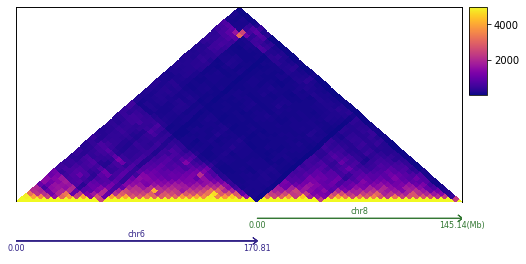

In [46]:
ten = tc.tenon(figsize=(8,1))
ten.add(pos='bottom', height=3.6)
ten.add(pos='bottom', height=1)

chr6_len = clr.chromsizes['chr6']
chr8_len = clr.chromsizes['chr8']

mat = tc.tl.extractContactRegions(clr='GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/5120000', 
                                  row_regions=['chr6', 'chr8'])
tc.pl.mapC(ax=ten.axs(0), mat=mat.cmat, map_type='tri', maxrange=5000, cmap='plasma')

tc.pl.multi_scale_track(ax=ten.axs(1), regions=['chr6:0-{0}'.format(chr6_len), 'chr8:0-{0}'.format(chr8_len)], 
                        scale_adjust='Mb', intervals=2, tick_rotation=0)


In [ ]:
ten = tc.tenon(figsize=(8,1))
ten.add(pos='bottom', height=3.6)
ten.add(pos='bottom', height=1)


mat = tc.tl.extractContactRegions(clr='GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/20000', 
                                  row_regions=['chr6', 'chr8'])
tc.pl.mapC(ax=ten.axs(0), mat=mat.cmat, map_type='tri', maxrange=5000, cmap='plasma')

tc.pl.multi_scale_track(ax=ten.axs(1), regions=['chr6:-{0}'.format(chr6_len), 'chr8:0-{0}'.format(chr8_len)], 
                        scale_adjust='Mb', intervals=2, tick_rotation=0)


## plot inter-chrom interaction

maxrange: 1000 minrange: 10.0


Text(0.5, 0, 'chr8')

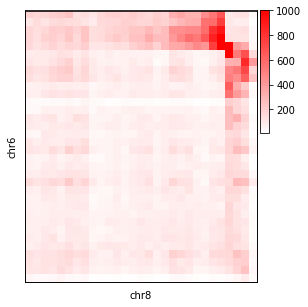

In [90]:
fig, axs = tc.make_spec(figsize=(5,5), width_ratios=[1], wspace=0.2)
mat = tc.tl.extractContactRegions(clr='GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/5120000', 
                                  row_regions='chr6', col_regions='chr8')
tc.pl.mapC(ax=axs[0], mat=mat.cmat, map_type='squ', symmetric=True, maxrange=1000, aspect=1)

axs[0].set_ylabel('chr6')
axs[0].set_xlabel('chr8')

maxrange: 10000 minrange: 77.0


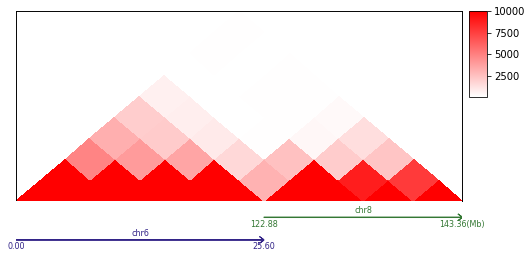

In [55]:
ten = tc.tenon(figsize=(8,1))
ten.add(pos='bottom', height=3.5)
ten.add(pos='bottom', height=1)

regions = ['chr6:0-25600000', 'chr8:122880000-143360000']
mat = tc.tl.extractContactRegions(clr='GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/5120000', row_regions=regions)
tc.pl.mapC(ax=ten.axs(0), mat=mat.cmat, map_type='triangle', symmetric=False, maxrange=10000)

tc.pl.multi_scale_track(ax=ten.axs(1), regions=regions, 
                        scale_adjust='Mb', intervals=2)